### articles analysis

In [1]:
import pandas as pd
from urllib.parse import unquote

articles = pd.read_csv('data/wikispeedia_paths-and-graph/articles.tsv', 
                      sep='\t', 
                      comment='#', 
                      header=None,
                      names=['article'])
# unquote the titles
articles = articles.map(unquote)
articles.head()

,article
0,Áedán_mac_Gabráin
1,Åland
2,Édouard_Manet
3,Éire
4,Óengus_I_of_the_Picts


### catagoires analysis

In [2]:
catagories = pd.read_csv('data/wikispeedia_paths-and-graph/categories.tsv',
                        sep='\t',
                        comment='#',
                        header=None,
                        names=['article', 'category'])
# unquote 
catagories = catagories.map(unquote)
catagories.head()

,article,category
0,Áedán_mac_Gabráin,subject.History.British_History.British_Histor...
1,Áedán_mac_Gabráin,subject.People.Historical_figures
2,Åland,subject.Countries
3,Åland,subject.Geography.European_Geography.European_...
4,Édouard_Manet,subject.People.Artists


### links analysis

In [3]:
links = pd.read_csv('data/wikispeedia_paths-and-graph/links.tsv',
                     sep='\t',
                     comment='#',
                     header=None,
                     names=['from', 'to'])
# unquote
links = links.map(unquote)
links.head()

,from,to
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland


path analysis

In [4]:
def load_and_unquote_paths(file_path, column_names):
    df = pd.read_csv(file_path, sep='\t', comment='#', header=None, names=column_names)
    df['path'] = df['path'].map(unquote)
    return df

paths_finished = load_and_unquote_paths('data/wikispeedia_paths-and-graph/paths_finished.tsv',
                                          ['hashedIpAddress','timestamp', 'durationInSec','path','rating'])
paths_finished.head()


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [5]:
paths_unfinished = load_and_unquote_paths('data/wikispeedia_paths-and-graph/paths_unfinished.tsv',
                                          ['hashedIpAddress','timestamp', 'durationInSec','path','target','type'])
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


In [6]:
with open('data/wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt', 'r') as file:
    data = file.readlines()
# remove comment 
data = [line.strip() for line in data if not line.startswith('#') and line.strip()]
# convert the data into a matrix
distance_matrix = [list(line) for line in data]
# convert the matrix into a DataFrame
df = pd.DataFrame(distance_matrix)
df.replace('_', pd.NA, inplace=True)
df = df.apply(pd.to_numeric)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4594,4595,4596,4597,4598,4599,4600,4601,4602,4603
0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,...,4.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0
1,NaN,0.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,...,4.0,2.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0
2,NaN,NaN,0.0,NaN,NaN,NaN,3.0,3.0,2.0,2.0,...,4.0,3.0,2.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0
3,NaN,NaN,NaN,0.0,NaN,NaN,3.0,3.0,3.0,3.0,...,4.0,2.0,2.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0
4,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.0,3.0,2.0,...,4.0,2.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0


Mean shortest-path distance: 3.201729547596255
Median shortest-path distance: 3.0


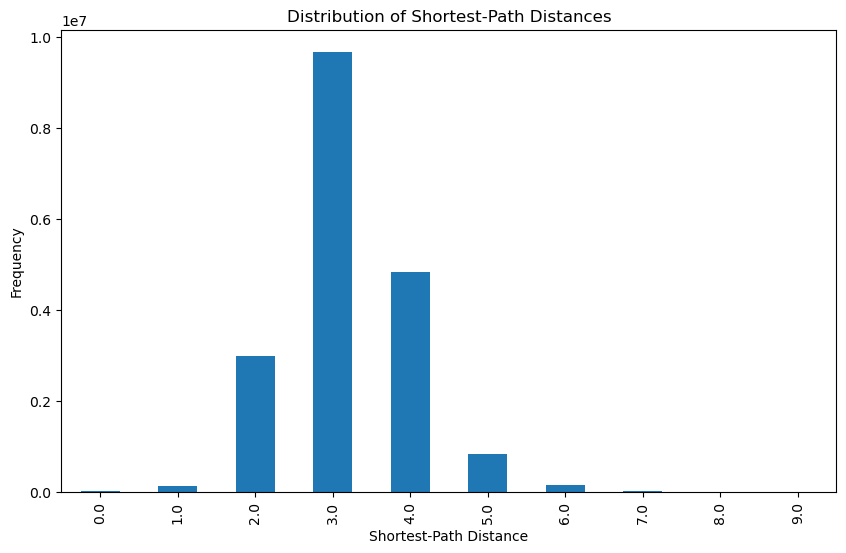

In [ ]:
import matplotlib.pyplot as plt

mean_distance = df.stack().mean()
median_distance = df.stack().median()
distance_distribution = df.stack().value_counts().sort_index()

print(f"Mean shortest-path distance: {mean_distance}")
print(f"Median shortest-path distance: {median_distance}")

plt.figure(figsize=(10, 6))
distance_distribution.plot(kind='bar')
plt.title('Distribution of Shortest-Path Distances')
plt.xlabel('Shortest-Path Distance')
plt.ylabel('Frequency')
plt.show()